# Review
Chapter 3 covers Probability Mass Functions (PMFs). The author does a good job with his choice in chapter flow. He also is very good about giving you the ability to recreate visualizations!

I thought the following quote sums up a good strategy:
> Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships. Once you have an idea what is going on, a good next step is to design a visualization that makes the patterns you have identified as clear as possible.



mean 23.692307692307693


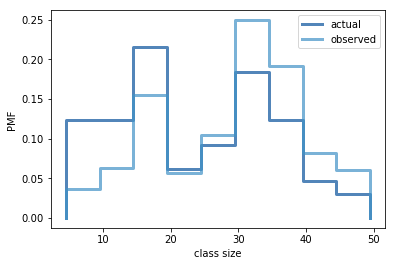

Pmf({7: 0.12307692307692308, 12: 0.12307692307692308, 17: 0.2153846153846154, 22: 0.06153846153846154, 27: 0.09230769230769231, 32: 0.18461538461538463, 37: 0.12307692307692308, 42: 0.046153846153846156, 47: 0.03076923076923077})


In [1]:
import thinkstats2
import thinkplot

d = {7: 8, 12: 8, 17: 14, 22: 4,
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2}

pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())


def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf


biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

print(pmf)

The class size paradox was confusing to me at first. I didnt quite get what the author was getting at. One thing to remember is the obvious fact that its a chapter on PMFs which I was conflating with histograms. They are very similar, but a PMF is a normalized histogram. And arguably there is a discrete vs continuous disparity as well, but for my practices they are both discrete given I use the python ecosystem.

The idea is that if you take a sample of students and ask them what thier class size was, you would get a bigger number than the actual. This is because there are more people in bigger classes.

Take a simple example: two classes, 1 with 1 person and 1 with 9.
$$Actual\ Average\ Class\ size:\frac{1 + 9}{2} = 5$$
If you ask the population you would get 9 people saying 9 and 1 person saying 1:
$$Poorly\ Calculated\ Average\ Class\ Size: \frac{9*9 + 1*1}{9 + 1} = 8.2$$

This would be a great way to lie with statistics... and an easy way to be confused without checking the workings of a calculation.

The rest of the chapter was a good intro to pandas indexing, which Im familiar with through the very good instruction at [DataCamp](https://www.datacamp.com/home)

# Exercises
## Exercise 1
Check out the [chap03ex.ipynb](chap03ex.ipynb) with the content for this exercise.

## Exercise 2
In Section 2.7 we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different:
$$\bar{x} = \sum_i p_i x_i$$
where the xi are the unique values in the PMF and pi=PMF(xi). Similarly, you can compute variance like this:
$$ S^2 = \sum_{i} p_i(x_i - \bar{x})^2$$
Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [2]:
def PmfMean(pmf):
    mean = 0
    for x, p in pmf.Items():
        mean += x * p
    return mean


def PmfVar(pmf):
    var = 0
    mean = PmfMean(pmf)
    for x, p in pmf.Items():
        var += p * (x - mean)**2
    return var

In [3]:
d = {7: 8, 12: 8, 17: 14, 22: 4,
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2}

pmf = thinkstats2.Pmf(d)

print('Function: ' + str(PmfMean(pmf)))
print('Method: ' + str(pmf.Mean()))

print('Function: ' + str(PmfVar(pmf)))
print('Method: ' + str(pmf.Var()))

Function: 23.692307692307693
Method: 23.692307692307693
Function: 128.67455621301775
Method: 128.67455621301775


## Exercise 3
I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.
To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?
*Hint: use nsfg.MakePregMap.*

---
This was actually covered in the [chap03ex.ipynb](chap03ex.ipynb)

## Exercise 4
In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called ObservedPmf that takes a Pmf representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new Pmf representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use relay.py, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7.5 mph with this group of runners. A solution to this exercise is in relay_soln.py.

---
This was also covered in the [chap03ex.ipynb](chap03ex.ipynb)

# Closing Comments
I was stuck at a couple points at first, but the exercises were really good to work though. Ifeel like I have a strong conceptual understanding of how pmf's work and I really appreciated the class size paradox. I was especially excited to work though the distribution of the percieved runners speeds! That was really neat.